In [1]:
import sklearn

In [1]:
import sklearn
from sklearn.tree import LinearDecisionTreeRegressor as ldtr
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn import datasets
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [2]:
X,y = datasets.load_diabetes(return_X_y=True)
X = X[:, 2].reshape(-1, 1)
X_train = X[:-20]
X_test = X[-20:]
y_train = y[:-20]
y_test = y[-20:]

In [4]:
data= pd.DataFrame(X)
data['10'] = y

In [5]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [6]:
data.corr()

,0,1,2,3,4,5,6,7,8,9,10
0,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
1,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
2,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
3,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
4,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
5,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
6,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
7,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
8,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
9,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483


In [38]:
X, y = make_regression(n_features=4)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [3]:
m = 150
#np.random.seed(42)
X = np.random.rand(m, 3) * 2
X= np.sort(X, axis= 0)
y = 4 * (X[:, 0] - 0.5) ** 2 + 6 * (X[:, 1] - 0.5)**2 + 2 * (X[:, 2] - 0.5)**5
y = y + np.random.randn(m,) / 10
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [4]:
X_train.shape

(120, 3)

In [5]:
reg1 = ldtr(max_depth= 2)
reg2 = LinearRegression(n_jobs = -1)
#reg3 = LinearSVR()
reg4 = SVR(kernel = 'rbf')
reg5 = DecisionTreeRegressor(max_depth = 2, min_samples_leaf= 3, min_samples_split= 6)
#reg6 = SGDRegressor(n_iter_no_change=250, penalty=None, eta0=0.0001, max_iter=100000)
reg7 = RandomForestRegressor(max_depth = 2,n_jobs = -1)

In [6]:
reg1.fit(X_train, y_train)
reg2.fit(X_train, y_train)
reg3.fit(X_train, y_train)
reg4.fit(X_train, y_train)
reg5.fit(X_train, y_train)
reg6.fit(X_train, y_train)
reg7.fit(X_train, y_train)

Decision Best 90 1.5009883046150208
5.1918087 5.1918087 5.3328934
linear Best 77 1.3871929049491882
3.0772905 5.1918087 3.0772905
3.0772905 5.1918087 4.005482
1 77
linear Best 54 0.9338315725326538
0.5879379 0.69801766 0.5879379
linear Best 38 0.6107071340084076
0.16467443 0.69801766 0.16467443
0.16467443 0.69801766 0.16467443
1 38
Decision Best 102 1.7104992866516113
0.057397753 0.057397753 0.07382397
Decision Best 102 1.7104992866516113
0.057397753 0.057397753 0.07382397
Decision Best 102 1.7104992866516113
0.057397753 0.057397753 0.07382397
0 102
1 90
0 72
1 107
0 54
1 48
2 530
 59
0 50
1 70
2 36
2 44
0 40
2 59
21  600 66

67
2 46
1 56
0 59
1 57
2 73
0 42
1 46
2 65
0 71
1 48
0 74
1 55
0 58
0 56
0 59
1 43
2 67
1 1 46
47
2 44
1 69
12 69
 67
1 46
1 52
1 37
10  54
60
1 62
2 42
0 61
1 47
0 49
0 68
1 74
1 56
02 55
 51
1 57
1 49
2 49
2 2 67
46
0 43
1 68
0 66
2 65
0 61
1 57
1 55
01 47
 51
1 44
2 74
1 42
2 69
0 43
1 69
0 57
1 50
2 58
0 58
2 41
2 57
0 62
2 45
1 46
2 45
0 71
0 70
0 63
2 62
12 

RandomForestRegressor(max_depth=2, n_jobs=-1)

In [7]:
y_pred1 = reg1.predict(X_test)
y_pred2 = reg2.predict(X_test)
y_pred3 = reg3.predict(X_test)
y_pred4 = reg4.predict(X_test)
y_pred5 = reg5.predict(X_test)
y_pred6 = reg6.predict(X_test)
y_pred7 = reg7.predict(X_test)

In [8]:
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred1))
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred2))
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred3))
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred4))
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred5))
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred6))
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred7))

Mean squared error: 0.10
Mean squared error: 16.89
Mean squared error: 36.99
Mean squared error: 13.57
Mean squared error: 6.42
Mean squared error: 40.31
Mean squared error: 4.58


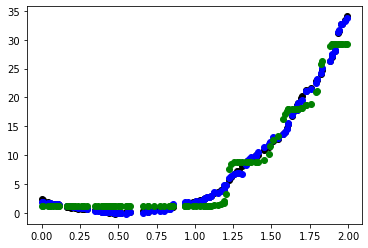

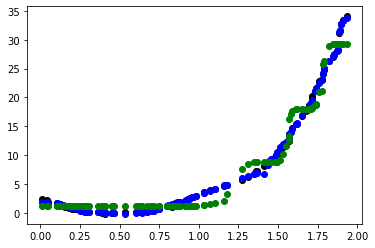

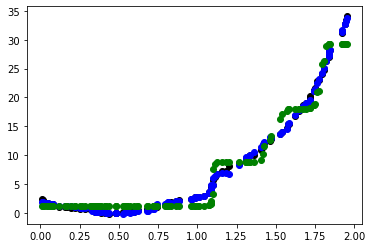

In [10]:
for i in range(X_train.shape[1]):
    plt.scatter(X_train[:, i], y_train,  color='black')
    plt.scatter(X_train[:, i], reg1.predict(X_train),  color='blue')
    plt.scatter(X_train[:, i], reg7.predict(X_train),  color='green')
    plt.show()

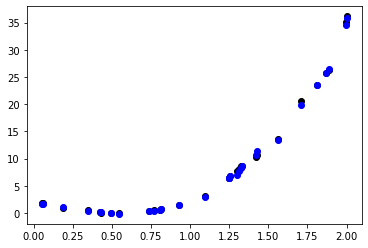

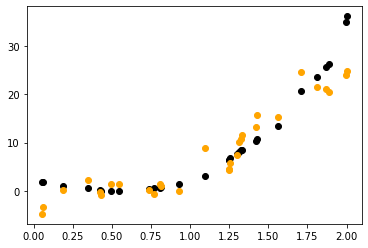

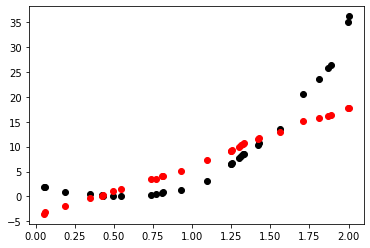

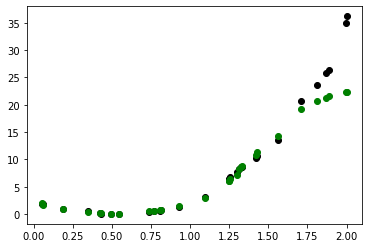

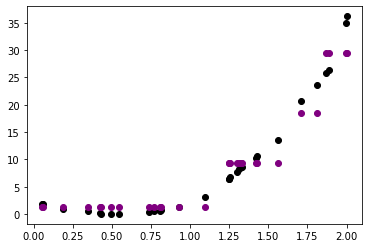

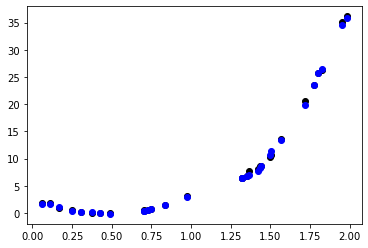

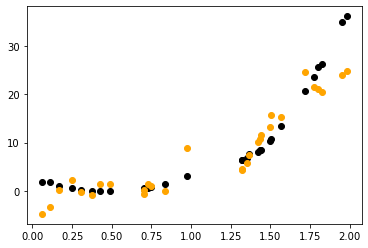

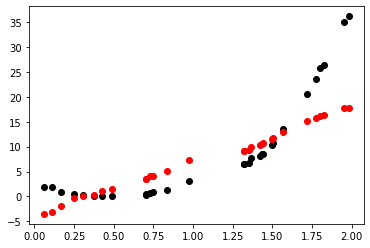

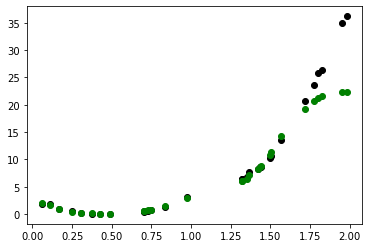

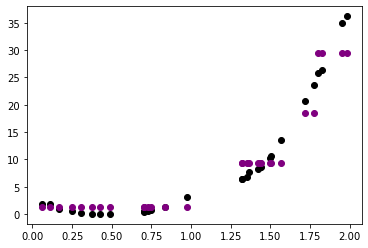

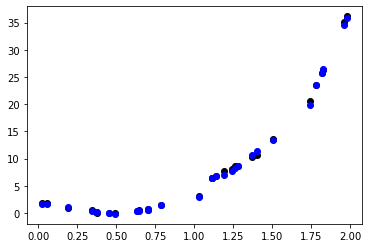

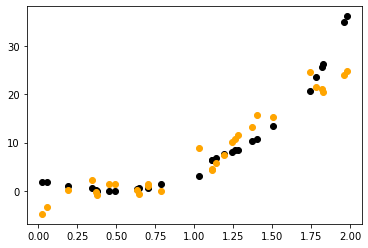

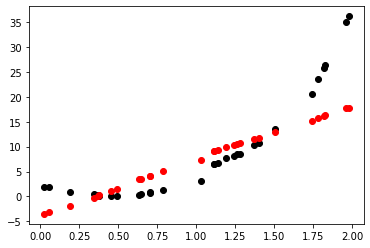

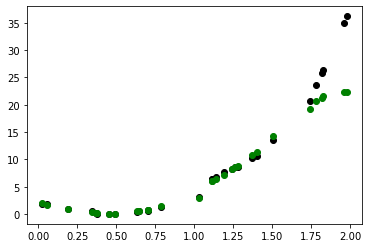

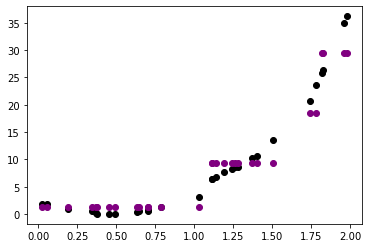

In [11]:
for i in range(X_test.shape[1]):
    plt.scatter(X_test[:, i], y_test,  color='black')
    plt.scatter(X_test[:, i], y_pred1, color='blue')
    plt.show()

    plt.scatter(X_test[:, i], y_test,  color='black')
    plt.scatter(X_test[:, i],y_pred2, color='orange')
    plt.show()

    plt.scatter(X_test[:, i], y_test,  color='black')
    plt.scatter(X_test[:, i],y_pred3, color='red')
    plt.show()

    plt.scatter(X_test[:, i], y_test,  color='black')
    plt.scatter(X_test[:, i], y_pred4, color='green')
    plt.show()

    plt.scatter(X_test[:, i], y_test,  color='black')
    plt.scatter(X_test[:, i], y_pred5, color='purple')
    plt.show()